<a href="https://colab.research.google.com/github/serega-sergei/SpringBoard_ML/blob/main/Siarhei_Siryk_Student_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project: Exploratory Data Analysis**

**Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset**

For more info please check https://github.com/springboard-curriculum/guild-mle-projects/blob/main/Student_MLE_MiniProject_EDA.ipynb

# **1. Basic Checks**

**1. Load the yellow_tripdata_2022-01.parquet file into Pandas.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/gdrive')

# Load the yellow_tripdata_2022-01.parquet file into Pandas
df = pd.read_parquet('/content/gdrive/MyDrive/Colab Notebooks/resources/yellow_tripdata_2022-01.parquet')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**2 Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).**

In [ ]:
# Display the first 5 rows to see the data
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [ ]:
df.shape

(2463931, 19)

In [ ]:
# Get just the data types of each column
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,int64


**3. How many rows are in the dataset? How many unique columns are in the dataset?**

In [ ]:
row_count = len(df)
row_count

2463931

In [ ]:
column_count = len(df.columns)
column_count

19

In [ ]:
# To verify the columns are unique (which they should be by default)
unique_column_count = len(set(df.columns))
unique_column_count

19

**4. Which columns have NULL values and how many NULL values are present in each of these columns?**

In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,71503
trip_distance,0
RatecodeID,71503
store_and_fwd_flag,71503
PULocationID,0
DOLocationID,0
payment_type,0


**5. Generate summary statistics using Pandas' describe method. Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.**

In [ ]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


**Some Anomalies:**
passenger_count can not be 0. From the https://www.nyc.gov/assets/tlc/downloads/

*   passenger_count can not be 0. From the https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf "This is a driver-entered value". So, I believe it is expected that drivers doesn't enter it sometimes
*   trip_distance shouldn't be null as well. It can be canceled trips or taxometer malfunction or smth else, so, probably, we don't want to consider such cases as well.

**6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.**

In [ ]:
df_clean = df.dropna()
df_clean

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392423,1,2022-01-31 23:24:28,2022-01-31 23:32:47,1.0,1.50,1.0,N,163,143,2,7.5,3.0,0.5,0.00,0.0,0.3,11.30,2.5,0.0
2392424,2,2022-01-31 23:17:44,2022-01-31 23:22:05,1.0,1.02,1.0,N,249,68,1,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.0
2392425,2,2022-01-31 23:26:41,2022-01-31 23:34:54,1.0,1.53,1.0,N,68,90,1,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5,0.0
2392426,2,2022-01-31 23:37:41,2022-01-31 23:45:26,1.0,1.59,1.0,N,90,79,1,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5,0.0


**Make sense** :) 2463931 (total row count) - 2392428 (raw with not nulls) = 71503 (number of nulls in 5 columns) . Seems like all these 5 columns are invalid/not complete data, the rest is fine.

# **2. Feature Engineering**

**1. Create a new feature that calculates the trip duration in minutes.**

In [ ]:
df_clean.loc[:, 'trip_duration'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60
df_clean

<ipython-input-76-11238b592ff4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'trip_duration'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392423,1,2022-01-31 23:24:28,2022-01-31 23:32:47,1.0,1.50,1.0,N,163,143,2,7.5,3.0,0.5,0.00,0.0,0.3,11.30,2.5,0.0,8.316667
2392424,2,2022-01-31 23:17:44,2022-01-31 23:22:05,1.0,1.02,1.0,N,249,68,1,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.0,4.350000
2392425,2,2022-01-31 23:26:41,2022-01-31 23:34:54,1.0,1.53,1.0,N,68,90,1,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5,0.0,8.216667
2392426,2,2022-01-31 23:37:41,2022-01-31 23:45:26,1.0,1.59,1.0,N,90,79,1,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5,0.0,7.750000


**2. Create new columns for pickup hour and day of week**

In [ ]:
df_clean.loc[:,'pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
df_clean.loc[:,'pickup_day_of_week'] = df_clean['tpep_pickup_datetime'].dt.day_name()
df_clean

<ipython-input-77-6271c1831299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
<ipython-input-77-6271c1831299>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'pickup_day_of_week'] = df_clean['tpep_pickup_datetime'].dt.day_name()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,pickup_hour,pickup_day_of_week
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,0,Saturday
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,0,Saturday
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,0,Saturday
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,0,Saturday
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392423,1,2022-01-31 23:24:28,2022-01-31 23:32:47,1.0,1.50,1.0,N,163,143,2,...,0.5,0.00,0.0,0.3,11.30,2.5,0.0,8.316667,23,Monday
2392424,2,2022-01-31 23:17:44,2022-01-31 23:22:05,1.0,1.02,1.0,N,249,68,1,...,0.5,1.86,0.0,0.3,11.16,2.5,0.0,4.350000,23,Monday
2392425,2,2022-01-31 23:26:41,2022-01-31 23:34:54,1.0,1.53,1.0,N,68,90,1,...,0.5,2.95,0.0,0.3,14.75,2.5,0.0,8.216667,23,Monday
2392426,2,2022-01-31 23:37:41,2022-01-31 23:45:26,1.0,1.59,1.0,N,90,79,1,...,0.5,2.26,0.0,0.3,13.56,2.5,0.0,7.750000,23,Monday


**3. Create a lineplot displaying the number of trips by pickup hour**

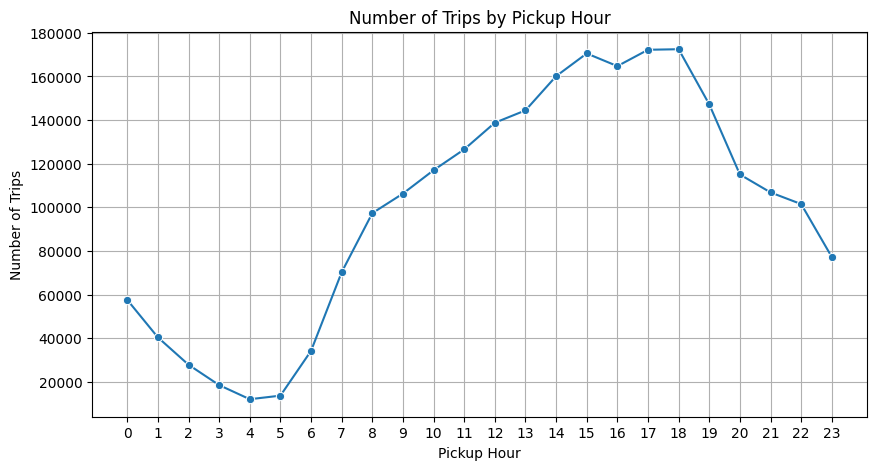

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of trips per pickup hour
hourly_trip_counts = df_clean['pickup_hour'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, marker='o')

# Formatting the plot
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.title("Number of Trips by Pickup Hour")
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are labeled
plt.grid(True)

**4. Create a lineplot displaying the number of trips by pickup day**

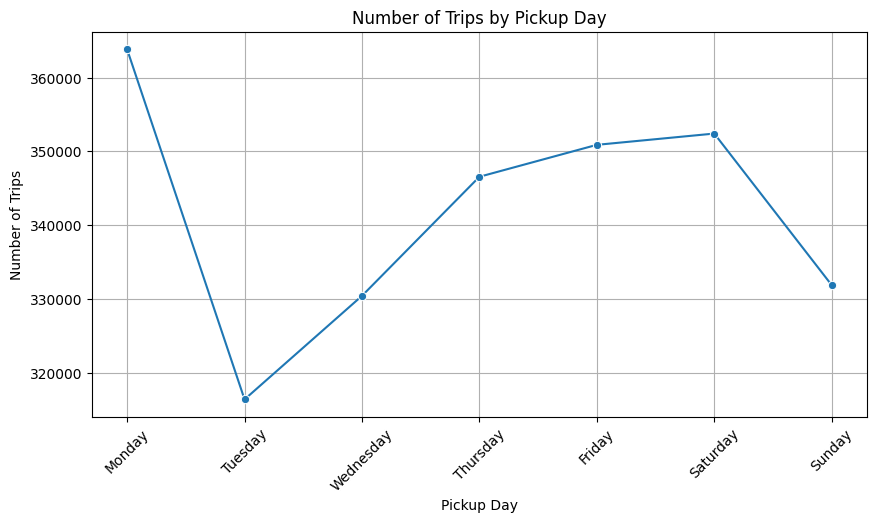

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of trips per pickup day
daily_trip_counts = df_clean['pickup_day_of_week'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_trip_counts.index, y=daily_trip_counts.values, marker='o')

# Formatting the plot
plt.xlabel("Pickup Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips by Pickup Day")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)

# Show the plot
plt.show()

# **3. Correlation Matrix**

**1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?**

               trip_distance  fare_amount  tip_amount  total_amount  \
trip_distance       1.000000     0.039426    0.491978      0.048724   
fare_amount         0.039426     1.000000    0.024196      0.999878   
tip_amount          0.491978     0.024196    1.000000      0.038133   
total_amount        0.048724     0.999878    0.038133      1.000000   
trip_duration       0.165854     0.008134    0.086206      0.009720   

               trip_duration  
trip_distance       0.165854  
fare_amount         0.008134  
tip_amount          0.086206  
total_amount        0.009720  
trip_duration       1.000000  


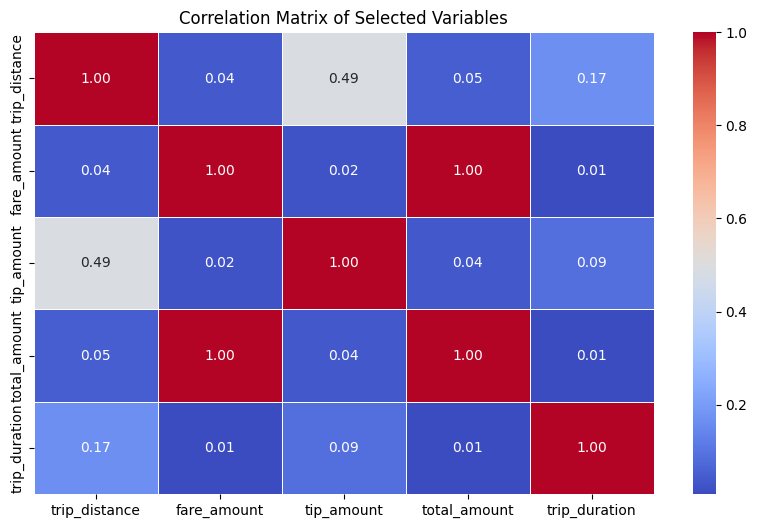

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific columns
corr_matrix = df_clean[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].corr()

# Display correlation matrix
print(corr_matrix)

# Plot heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Formatting the plot
plt.title("Correlation Matrix of Selected Variables")
plt.show()

**fare_amount & total_amount** → 1.00 Highly correlated

**tip_amount & trip_distance** → 0.49 Moderately correlated

# **4. Pairplot Matrix**

**1. Create a pairplot matrix using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the sample method in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?**

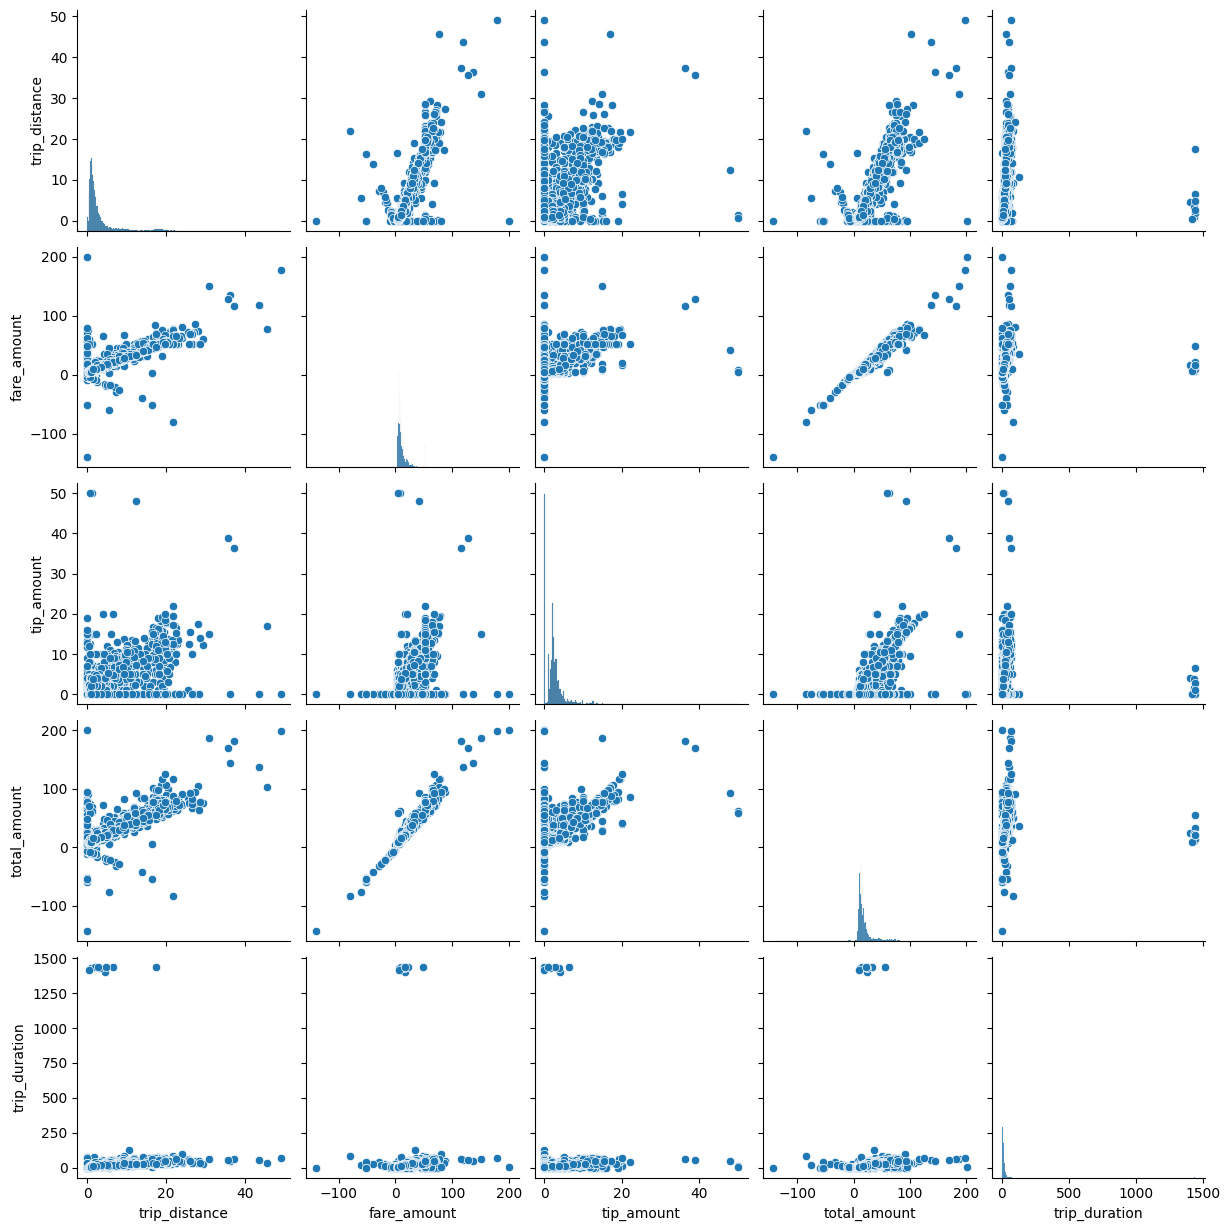

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample the dataset to reduce memory usage
sample_size = 10000
df_sample = df_clean.sample(sample_size)

# Create a pairplot matrix
sns.pairplot(df_sample[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']])

# Show the plot
plt.show()

**fare_amount & total_amount** → Strong relationship, almost like y = x

**tip_amount & trip_distance** → Moderate relation ship, like y = 2*x

**trip_distance with fare amount and total amount** → Seems like some correlation there, though not sure, seems like y = 2x - a

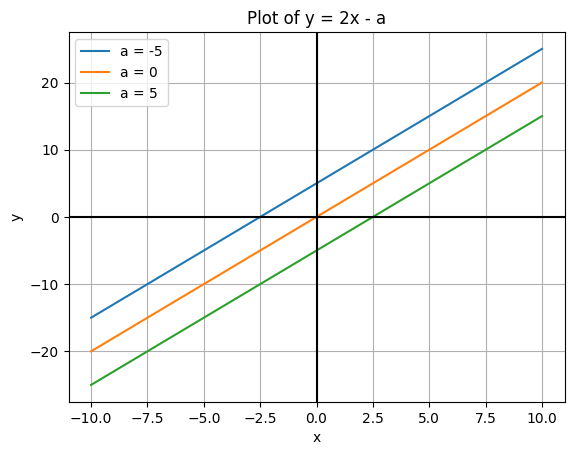

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x, a):
    return 2*x - a

# Create an array of x values
x = np.linspace(-10, 10, 400)

# Create a plot for different values of 'a'
for a in [-5, 0, 5]:
    y = f(x, a)
    plt.plot(x, y, label=f"a = {a}")

# Add title and labels
plt.title("Plot of y = 2x - a")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

# **5. Count Plot**

**1. Use Seaborn to create a countplot for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?**

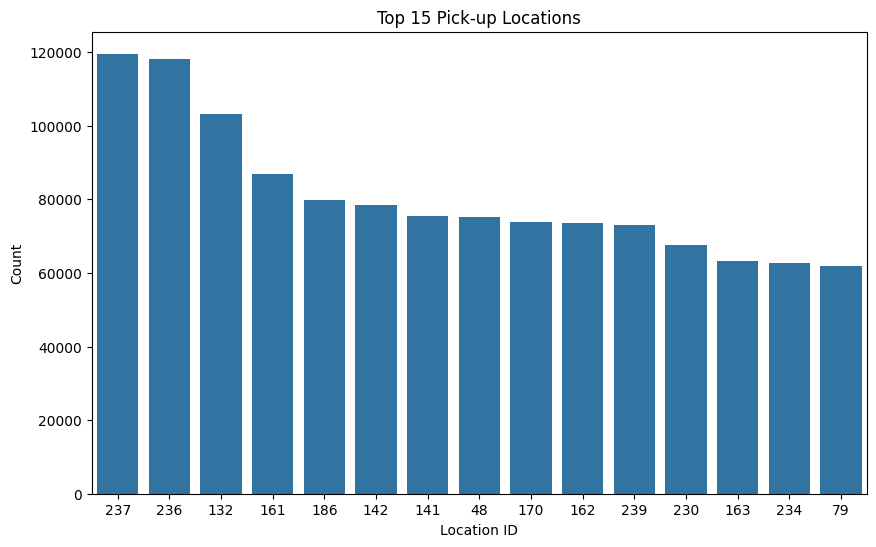

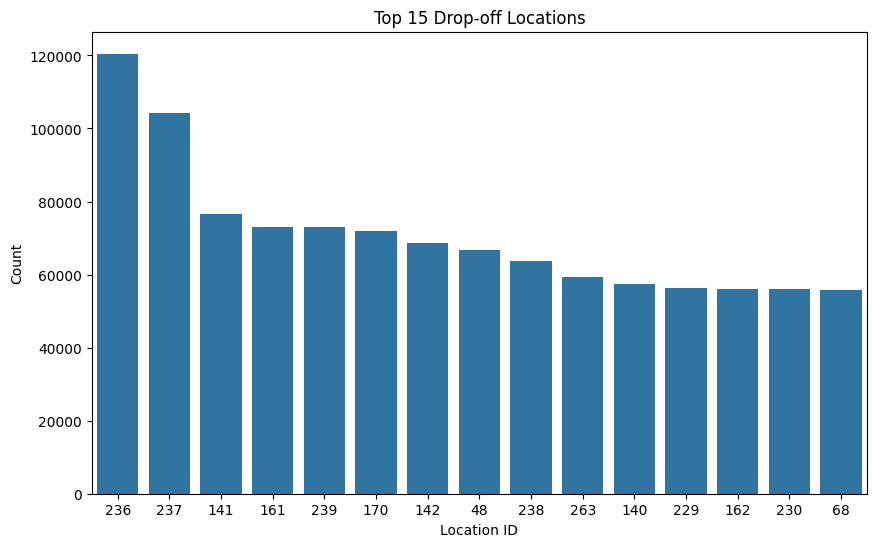

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 15 pick-up and drop-off locations
top_pickup_locations = df_clean['PULocationID'].value_counts().head(15)
top_dropoff_locations = df_clean['DOLocationID'].value_counts().head(15)

# Create a countplot for the top pick-up locations
plt.figure(figsize=(10,6))
sns.countplot(x='PULocationID', data=df_clean, order=top_pickup_locations.index)
plt.title('Top 15 Pick-up Locations')
plt.xlabel('Location ID')
plt.ylabel('Count')
plt.show()

# Create a countplot for the top drop-off locations
plt.figure(figsize=(10,6))
sns.countplot(x='DOLocationID', data=df_clean, order=top_dropoff_locations.index)
plt.title('Top 15 Drop-off Locations')
plt.xlabel('Location ID')
plt.ylabel('Count')
plt.show()

The most popular pick-up location is 237

# **6. Box Plot**

**1. Use Seaborn's boxplot to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?**

         payment_type  total_amount
0                   1         21.95
1                   1         13.30
2                   1         10.56
3                   2         11.80
4                   1         30.30
...               ...           ...
2392423             2         11.30
2392424             1         11.16
2392425             1         14.75
2392426             1         13.56
2392427             1         20.76

[2392428 rows x 2 columns]


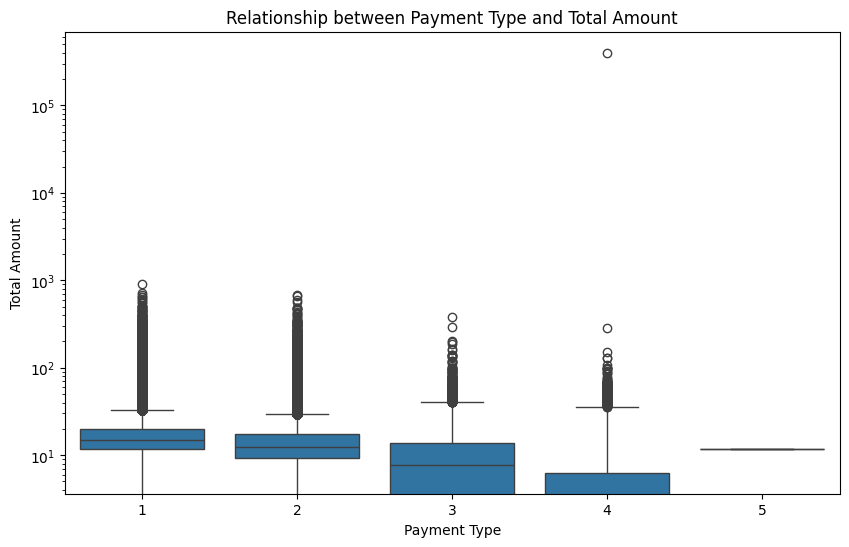

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df_clean[['payment_type', 'total_amount']])


plt.figure(figsize=(10,6))
sns.boxplot(x='payment_type', y='total_amount', data=df_clean)
plt.yscale('log')
plt.title('Relationship between Payment Type and Total Amount')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.show()

Payment_type A numeric code signifying how the passenger paid for the trip.

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip


1. 6= Voided trip - seems like is not captured at all. I think it is in 3 - "No charge".
2. 5= Unknown - looks weird. Though as shown below, it is only 1 charge.

In [ ]:
print(df_clean['payment_type'].value_counts())

payment_type
1    1874874
2     495171
3      11709
4      10673
5          1
Name: count, dtype: int64


# **7. Histogram**

**1. Use Seaborn's histplot to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.**

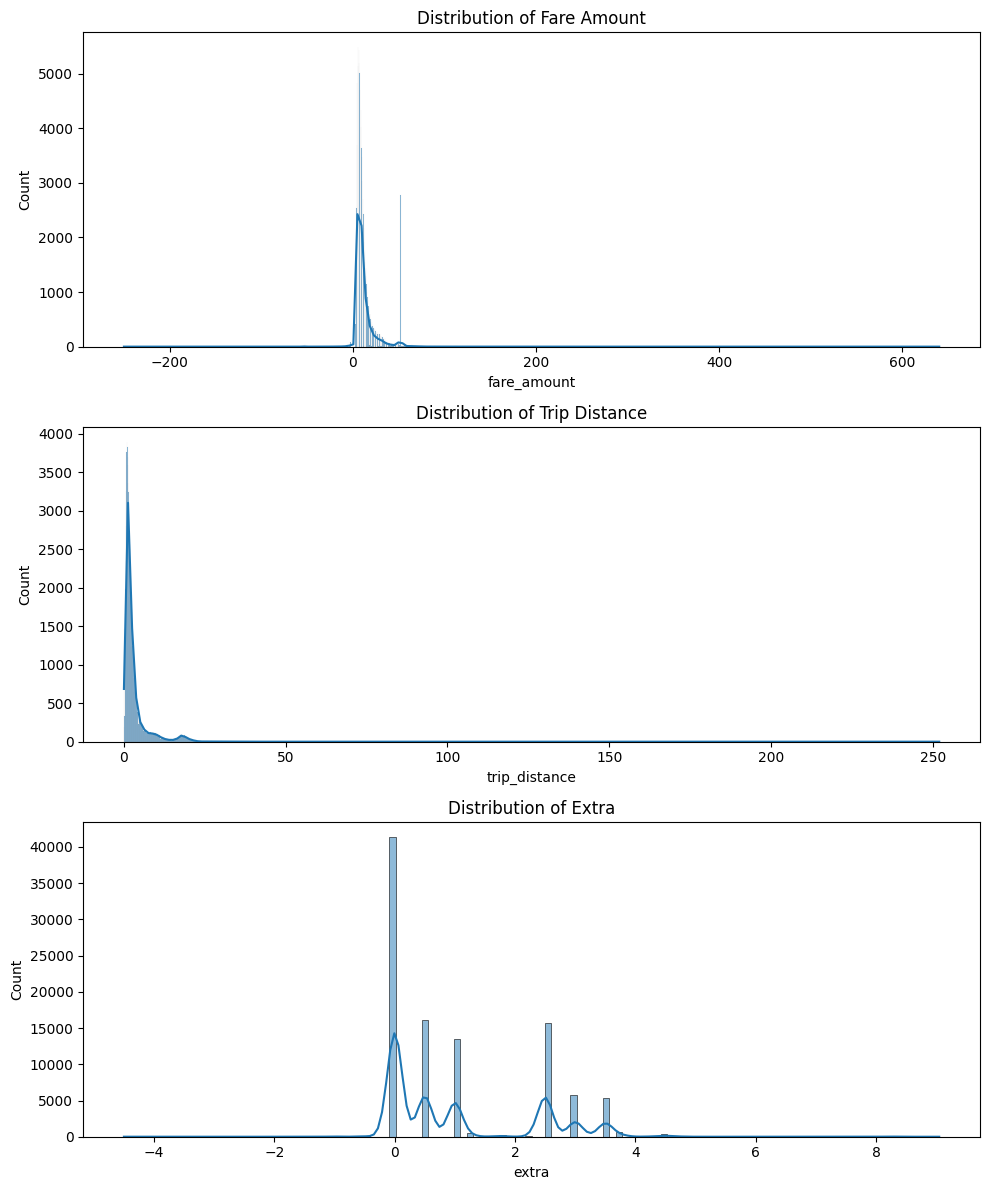

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample the data if it's too large
sample_size = 100000
df_sample = df_clean.sample(sample_size)

# Create a figure with three subplots
fig, axs = plt.subplots(3, figsize=(10, 12))

# Plot the distribution of fare_amount
sns.histplot(df_sample['fare_amount'], ax=axs[0], kde=True)
axs[0].set_title('Distribution of Fare Amount')

# Plot the distribution of trip_distance
sns.histplot(df_sample['trip_distance'], ax=axs[1], kde=True)
axs[1].set_title('Distribution of Trip Distance')

# Plot the distribution of extra
sns.histplot(df_sample['extra'], ax=axs[2], kde=True)
axs[2].set_title('Distribution of Extra')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()